In [63]:
import pandas as pd
import numpy as np

In [64]:
path = r'datos\2024_01\Inversor_6T2099037507_Inverter(COM1-2)_20240101000000_20240131235959.xlsx'
df = pd.read_excel(path, header=3)

df.dropna(axis=1, how='all')
df.drop(
    [
    'Nombre del sitio', 
    'Dominio de gestión',
    'Nombre del dispositivo', 
    'WiFi Intensidad de la señal(dBm)', 
    'Cantidad acumulada de electricidad absorbida(kWh)',
    'Tensión entre PV- y la tierra(V)',
    'Tensión de línea AB de la red/Tensión de la red(V)',
    'Tensión entre PV- y la tierra(V)',

    ], 
    axis=1, 
    inplace=True
    )

df['Estado del inversor'] = np.where(df['Estado del inversor'] == 'En la red', 1, 0) # ONE HOT ENCODING 
df['Hora de inicio'] = pd.to_datetime(df['Hora de inicio'])
df['Hora de apagado del inversor'] = pd.to_datetime(df['Hora de apagado del inversor'])
df['Hora de inicio del inversor'] = pd.to_datetime(df['Hora de inicio del inversor'])
df

e:\Cloud\OneDrive\Facultad\GER\Proyecto final - Diseño de tableros\Prediccion de despacho\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Hora de inicio,Alimentación de CA de la red(V),Corriente B de fase de la red(A),Corriente C de fase de la red(A),Corriente de entrada de FV1(A),Corriente de entrada de FV2(A),Corriente de entrada de FV3(A),Corriente de entrada de FV4(A),Corriente de entrada de FV5(A),Corriente de entrada de FV6(A),...,Tensión de entrada de FV36(V),Tensión de entrada PV9(V),Tensión de entrada PV10(V),Tensión de entrada PV11(V),Tensión de entrada PV12(V),Tensión de entrada PV13(V),Tensión de entrada PV14(V),Tensión de fase A(V),Tensión de fase B(V),Tensión de fase C(V)
0,2024-01-01 00:00:00,NaN,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-01-01 05:35:00,NaN,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-01-01 05:40:00,NaN,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,572.3,572.3,212.4,212.4,568.0,568.0,227.0,227.3,225.2
3,2024-01-01 05:45:00,390.7,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,526.6,526.6,526.6,526.6,526.5,526.5,227.1,227.4,226.2
4,2024-01-01 05:50:00,389.6,0.091,0.148,0.03,0.00,0.03,0.00,0.03,0.00,...,NaN,538.6,538.6,487.2,487.2,556.5,556.5,226.0,226.6,226.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,2024-01-31 20:00:00,382.8,0.155,0.156,0.08,-0.01,0.04,0.01,0.05,-0.01,...,NaN,528.6,528.6,485.3,485.3,534.5,534.5,221.7,223.1,222.1
5765,2024-01-31 20:05:00,383.0,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,433.7,433.7,434.6,434.6,434.5,434.5,221.7,223.1,221.1
5766,2024-01-31 20:10:00,382.0,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,149.1,149.1,149.8,149.8,149.5,149.5,221.7,223.1,221.1
5767,2024-01-31 20:15:00,382.0,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,149.1,149.1,149.8,149.8,149.5,149.5,221.7,223.1,221.1


In [65]:
# Columnas de Corriente FV
cols_corriente_fv = [
    'Corriente de entrada de FV1(A)', 'Corriente de entrada de FV2(A)', 'Corriente de entrada de FV3(A)', 
    'Corriente de entrada de FV4(A)', 'Corriente de entrada de FV5(A)', 'Corriente de entrada de FV6(A)', 
    'Corriente de entrada de FV7(A)', 'Corriente de entrada de FV8(A)', 'Corriente de entrada de FV15(A)', 
    'Corriente de entrada de FV16(A)', 'Corriente de entrada de FV17(A)', 'Corriente de entrada de FV18(A)', 
    'Corriente de entrada de FV19(A)', 'Corriente de entrada de FV20(A)', 'Corriente de entrada de FV21(A)', 
    'Corriente de entrada de FV22(A)', 'Corriente de entrada de FV23(A)', 'Corriente de entrada de FV24(A)', 
    'Corriente de entrada de FV25(A)', 'Corriente de entrada de FV26(A)', 'Corriente de entrada de FV27(A)', 
    'Corriente de entrada de FV28(A)', 'Corriente de entrada de FV29(A)', 'Corriente de entrada de FV30(A)', 
    'Corriente de entrada de FV31(A)', 'Corriente de entrada de FV32(A)', 'Corriente de entrada de FV33(A)', 
    'Corriente de entrada de FV34(A)', 'Corriente de entrada de FV35(A)', 'Corriente de entrada de FV36(A)', 
    'Corriente de entrada PV9(A)', 'Corriente de entrada PV10(A)', 'Corriente de entrada PV11(A)', 
    'Corriente de entrada PV12(A)', 'Corriente de entrada PV13(A)', 'Corriente de entrada PV14(A)'
]

# Columnas de Tensión FV
cols_tension_fv = [
    'Tensión de entrada de FV1(V)', 'Tensión de entrada de FV2(V)', 'Tensión de entrada de FV3(V)', 
    'Tensión de entrada de FV4(V)', 'Tensión de entrada de FV5(V)', 'Tensión de entrada de FV6(V)', 
    'Tensión de entrada de FV7(V)', 'Tensión de entrada de FV8(V)', 'Tensión de entrada de FV15(V)', 
    'Tensión de entrada de FV16(V)', 'Tensión de entrada de FV17(V)', 'Tensión de entrada de FV18(V)', 
    'Tensión de entrada de FV19(V)', 'Tensión de entrada de FV20(V)', 'Tensión de entrada de FV21(V)', 
    'Tensión de entrada de FV22(V)', 'Tensión de entrada de FV23(V)', 'Tensión de entrada de FV24(V)', 
    'Tensión de entrada de FV25(V)', 'Tensión de entrada de FV26(V)', 'Tensión de entrada de FV27(V)', 
    'Tensión de entrada de FV28(V)', 'Tensión de entrada de FV29(V)', 'Tensión de entrada de FV30(V)', 
    'Tensión de entrada de FV31(V)', 'Tensión de entrada de FV32(V)', 'Tensión de entrada de FV33(V)', 
    'Tensión de entrada de FV34(V)', 'Tensión de entrada de FV35(V)', 'Tensión de entrada de FV36(V)', 
    'Tensión de entrada PV9(V)', 'Tensión de entrada PV10(V)', 'Tensión de entrada PV11(V)', 
    'Tensión de entrada PV12(V)', 'Tensión de entrada PV13(V)', 'Tensión de entrada PV14(V)'
]

# Columnas de Energía MPPT
cols_energia_mppt = [
    'Energía acumulativa CC MPPT 1(kWh)', 'Energía acumulativa CC MPPT 2(kWh)', 'Energía acumulativa CC MPPT 3(kWh)', 
    'Energía acumulativa CC MPPT 4(kWh)', 'Energía acumulativa CC MPPT 5(kWh)', 'Energía acumulativa CC MPPT 6(kWh)', 
    'Energía acumulativa CC MPPT 7(kWh)', 'Energía acumulativa CC MPPT 8(kWh)', 'Energía acumulativa CC MPPT 9(kWh)', 
    'Energía acumulativa CC MPPT 10(kWh)'
]

# --- 2. CREACIÓN DE NUEVAS FEATURES AGREGADAS ---
print("Creando nuevas features agregadas...")

# Llenar valores nulos con 0 antes de sumar/promediar para evitar resultados nulos
df[cols_corriente_fv] = df[cols_corriente_fv].fillna(0)
df[cols_tension_fv] = df[cols_tension_fv].fillna(0)
df[cols_energia_mppt] = df[cols_energia_mppt].fillna(0)

# A. Corriente Total FV
df['Corriente_FV_Total(A)'] = df[cols_corriente_fv].sum(axis=1)

# B. Tensión Promedio FV
# Se reemplazan los 0 con NaN para que no afecten el promedio si no hay tensión
df_tension_no_cero = df[cols_tension_fv].replace(0, np.nan)
df['Tension_FV_Promedio(V)'] = df_tension_no_cero.mean(axis=1)

# C. Potencia Total de Entrada FV (Opción recomendada)
# (Tension1 * Corriente1) + (Tension2 * Corriente2) + ...
potencia_total = pd.Series(0, index=df.index)
for v_col, c_col in zip(cols_tension_fv, cols_corriente_fv):
    # Asegurarse de que ambas columnas existan en el df antes de multiplicar
    if v_col in df.columns and c_col in df.columns:
        potencia_total += df[v_col] * df[c_col]
# Convertir de W a kW y crear la columna
df['Potencia_Entrada_FV_Total(kW)'] = potencia_total / 1000

# D. Energía Total MPPT
df['Energia_MPPT_Total(kWh)'] = df[cols_energia_mppt].sum(axis=1)

print("Nuevas features creadas.")


# --- 3. ELIMINACIÓN DE COLUMNAS ORIGINALES ---
print("Eliminando columnas originales redundantes...")

# Juntar todas las listas de columnas que ya no necesitamos
columnas_a_dropear = cols_corriente_fv + cols_tension_fv + cols_energia_mppt

# Eliminar las columnas
df.drop(columns=columnas_a_dropear, inplace=True)

print("Columnas eliminadas.")


# --- 4. VERIFICACIÓN FINAL ---
print("\n--- Vista previa del DataFrame transformado ---")
# Filtramos para ver solo algunas de las columnas nuevas y otras importantes
columnas_a_mostrar = [
    'Hora de inicio', 
    'Corriente_FV_Total(A)', 
    'Tension_FV_Promedio(V)', 
    'Potencia_Entrada_FV_Total(kW)',
    'Potencia activa(kW)',
    'Energia_MPPT_Total(kWh)',
    'Eficiencia del inversor(%)'
]
columnas_existentes = [col for col in columnas_a_mostrar if col in df.columns]


Creando nuevas features agregadas...
Nuevas features creadas.
Eliminando columnas originales redundantes...
Columnas eliminadas.

--- Vista previa del DataFrame transformado ---


In [71]:
df[columnas_existentes].head()

,Hora de inicio,Corriente_FV_Total(A),Tension_FV_Promedio(V),Potencia_Entrada_FV_Total(kW),Potencia activa(kW),Energia_MPPT_Total(kWh),Eficiencia del inversor(%)
0,2024-01-01 00:00:00,-0.08,-0.100000,0.000008,0.000,400041.40,0.00
1,2024-01-01 05:35:00,-0.08,-0.100000,0.000008,0.000,400041.40,0.00
2,2024-01-01 05:40:00,-0.08,345.985714,0.000008,0.000,400041.40,0.00
3,2024-01-01 05:45:00,-0.04,403.883333,0.000004,0.000,400041.40,0.00
4,2024-01-01 05:50:00,0.20,397.916667,0.125170,0.121,400041.41,76.72


In [74]:
df = df[columnas_existentes]

<Axes: >

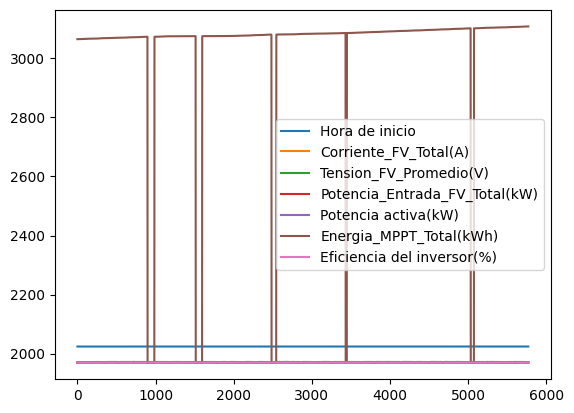

In [75]:
df.plot()

In [67]:
df.columns.to_list()

['Hora de inicio',
 'Alimentación de CA de la red(V)',
 'Corriente B de fase de la red(A)',
 'Corriente C de fase de la red(A)',
 'Corriente de fase A de la red/ Corriente de la red(A)',
 'Eficiencia del inversor(%)',
 'Energía acumulativa(kWh)',
 'Energía annual(kWh)',
 'Energía diaria(kWh)',
 'Energía mensual(kWh)',
 'Estado del inversor',
 'Factor de potencia',
 'Frecuencia de la red eléctrica(Hz)',
 'Hora de apagado del inversor',
 'Hora de inicio del inversor',
 'Potencia activa(kW)',
 'Potencia de entrada total(kW)',
 'Potencia reactiva de salida(kvar)',
 'Producción de hoy(kWh)',
 'Producción total(kWh)',
 'Temperatura interna(℃)',
 'Tensión BC de la red(V)',
 'Tensión de fase A(V)',
 'Tensión de fase B(V)',
 'Tensión de fase C(V)',
 'Corriente_FV_Total(A)',
 'Tension_FV_Promedio(V)',
 'Potencia_Entrada_FV_Total(kW)',
 'Energia_MPPT_Total(kWh)']

In [76]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Hora de inicio,5769,2024-01-16 06:46:52.272490496,2024-01-01 00:00:00,2024-01-08 14:35:00,2024-01-15 19:20:00,2024-01-23 20:25:00,2024-01-31 20:20:00,NaN
Corriente_FV_Total(A),5769.0,48.254034,-0.08,3.01,29.67,90.21,165.27,49.38856
Tension_FV_Promedio(V),5377.0,600.07805,-0.1,589.25,612.74,632.95,767.29,69.005284
Potencia_Entrada_FV_Total(kW),5769.0,32.452918,-0.014834,2.014466,20.695519,61.238283,112.097931,32.770059
Potencia activa(kW),5769.0,31.794909,0.0,1.989,20.482,60.098,108.931,32.001924
Energia_MPPT_Total(kWh),5769.0,386769.933515,0.0,403588.56,406350.85,410720.6,415714.45,89091.501671
Eficiencia del inversor(%),5769.0,84.822881,0.0,93.86,98.2,98.42,98.69,31.397822


In [77]:
df.isnull().sum()

Hora de inicio                     0
Corriente_FV_Total(A)              0
Tension_FV_Promedio(V)           392
Potencia_Entrada_FV_Total(kW)      0
Potencia activa(kW)                0
Energia_MPPT_Total(kWh)            0
Eficiencia del inversor(%)         0
dtype: int64

In [78]:
df.corr()

,Hora de inicio,Corriente_FV_Total(A),Tension_FV_Promedio(V),Potencia_Entrada_FV_Total(kW),Potencia activa(kW),Energia_MPPT_Total(kWh),Eficiencia del inversor(%)
Hora de inicio,1.000000,0.165548,0.135302,0.165460,0.165308,0.142180,0.064894
Corriente_FV_Total(A),0.165548,1.000000,0.151259,0.999305,0.999023,0.231858,0.417624
Tension_FV_Promedio(V),0.135302,0.151259,1.000000,0.162225,0.165014,0.118482,0.434938
Potencia_Entrada_FV_Total(kW),0.165460,0.999305,0.162225,1.000000,0.999866,0.234829,0.423535
Potencia activa(kW),0.165308,0.999023,0.165014,0.999866,1.000000,0.235547,0.425310
Energia_MPPT_Total(kWh),0.142180,0.231858,0.118482,0.234829,0.235547,1.000000,0.621303
Eficiencia del inversor(%),0.064894,0.417624,0.434938,0.423535,0.425310,0.621303,1.000000
